# Zeitlicher Ablauf der Datenerfassung mit Bildern 

Thema
 ------
 
 In diesem Jupyter Notebook geht es, um die Darstellung eines Ausschnitts der Datenerfassung von der Android TN Fahrradwege Monitoring App. Dabei werden die tatsächlichen Zeitlichen Ereignisse genutzt.

In [3]:
# Import von Bibliotheken
import os
import pandas
import numpy as np
import cv2
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
import matplotlib.ticker as FormatStrFormatter
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)

In [4]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("../daten/merkmale.csv")
featuresDf.describe()

,Zeitstempel in Unixzeit,Breitengrad,Laengengrad,Geschwindigkeit in km/h,Hoehe in m ueber WGS 84,Anzahl der Messwerte,Start des Zeitfensters in ns seit Start der JVM,Start der Messwerterfassung in ns seit Start der JVM,Start der Belichtung in ns seit Start der JVM,Belichtungszeit in ns,...,Varianz X-Achse Beschleunigung in m/s^2,Varianz Y-Achse Beschleunigung in m/s^2,Varianz Z-Achse Beschleunigung in m/s^2,Varianz Nick in rad,Varianz Roll in rad,Standardabweichung X-Achse Beschleunigung in m/s^2,Standardabweichung Y-Achse Beschleunigung in m/s^2,Standardabweichung Z-Achse Beschleunigung in m/s^2,Standardabweichung Nick in rad,Standardabweichung Roll in rad
count,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,...,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000
mean,1.521815e+12,53.611756,10.141385,15.431479,70.983613,19.335401,1.232928e+14,1.232927e+14,1.232928e+14,1.717044e+07,...,5.090925,40.109086,47.298581,0.453278,0.755017,1.843783,4.890581,5.664694,0.604631,0.617375
std,1.711999e+05,0.001963,0.004292,2.578698,2.540434,0.574053,1.712002e+11,1.712002e+11,1.712005e+11,5.915285e+06,...,9.928539,84.530317,74.631600,0.415298,1.384871,1.300870,4.024882,3.900985,0.296218,0.611603
min,1.521815e+12,53.608086,10.136243,6.012000,64.299440,14.000000,1.229923e+14,1.229923e+14,1.229924e+14,1.000184e+07,...,0.051570,0.293240,0.390830,0.004730,0.001030,0.227090,0.541520,0.625160,0.068770,0.032090
25%,1.521815e+12,53.610050,10.137212,14.256000,69.145140,19.000000,1.231447e+14,1.231447e+14,1.231448e+14,1.000184e+07,...,0.955515,5.312705,8.138980,0.129180,0.027425,0.977505,2.304930,2.852890,0.359415,0.165605
50%,1.521815e+12,53.612152,10.140454,15.768001,71.069275,19.000000,1.232957e+14,1.232956e+14,1.232957e+14,2.000368e+07,...,2.177540,13.362630,20.536700,0.327060,0.113760,1.475650,3.655490,4.531740,0.571890,0.337280
75%,1.521815e+12,53.613777,10.145028,17.208002,72.942380,20.000000,1.234378e+14,1.234377e+14,1.234378e+14,2.000368e+07,...,5.343015,33.826275,52.282975,0.663675,0.834570,2.311500,5.816035,7.230695,0.814660,0.913545
max,1.521815e+12,53.613907,10.149695,20.268002,77.023680,22.000000,1.235899e+14,1.235898e+14,1.235899e+14,2.999632e+07,...,190.706400,1037.005440,998.218210,2.811090,12.292420,13.809650,32.202570,31.594590,1.676630,3.506050


In [5]:
featuresDf.columns

Index(['Zeitstempel in Unixzeit', 'Breitengrad', 'Laengengrad',
       'Geschwindigkeit in km/h', 'Hoehe in m ueber WGS 84',
       'X-Achse Beschleunigungswerte in m/s^2',
       'Y-Achse Beschleunigungswerte in m/s^2',
       'Z-Achse Beschleunigungswerte in m/s^2', 'Gier Messwerte in rad',
       'Nick Messwerte in rad', 'Roll Messwerte in rad',
       'Zeitstempel der Messwerte in ns', 'Anzahl der Messwerte',
       'Start des Zeitfensters in ns seit Start der JVM',
       'Start der Messwerterfassung in ns seit Start der JVM',
       'Start der Belichtung in ns seit Start der JVM',
       'Belichtungszeit in ns',
       'Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM',
       'Stopp der Messwerterfassung in Unixzeit',
       'Mittelwert X-Achse Beschleunigung in m/s^2',
       'Mittelwert Y-Achse Beschleunigung in m/s^2',
       'Mittelwert Z-Achse Beschleunigung in m/s^2', 'Mittelwert Nick in rad',
       'Mittelwert Roll in rad', 'Gier-Aenderung in rad',
    

In [6]:
%%time
# Lade Messwerte 
accXDf = pandas.read_csv("../daten/x-Achse-Beschleunigungswerte.csv")
accXDf.drop(['index'],axis=1 ,inplace=True)
accYDf = pandas.read_csv("../daten/y-Achse-Beschleunigungswerte.csv")
accYDf.drop(['index'],axis=1 ,inplace=True)
accZDf = pandas.read_csv("../daten/z-Achse-Beschleunigungswerte.csv")
accZDf.drop(['index'],axis=1 ,inplace=True)
pitchDf = pandas.read_csv("../daten/nick-Messwerte.csv")
pitchDf.drop(['index'],axis=1 ,inplace=True)
rollDf = pandas.read_csv("../daten/roll-Messwerte.csv")
rollDf.drop(['index'],axis=1 ,inplace=True)
azimuthDf = pandas.read_csv("../daten/azimuth-Messwerte.csv")
azimuthDf.drop(['index'],axis=1 ,inplace=True)
sensorTimestampsDf = pandas.read_csv("../daten/sensorevent-Zeitstempel.csv")
sensorTimestampsDf.drop(['index'],axis=1 ,inplace=True)

Wall time: 108 ms


In [7]:
# Index von welchem die Messwerte dargestellt werden sollen
row = 420
# Der erste und letzte Zeitstempel der Messwerterfassung
sensorTimestamps =  sensorTimestampsDf.iloc[row] / 1000000
timestampsMinMax = [sensorTimestampsDf.iloc[row,0]/ 1000000,sensorTimestampsDf.iloc[[row]].dropna(axis=1, how='any').iloc[0,-1]/ 1000000]
# Belichtungszeit vom Start bis zum Ende
startExposureTime = featuresDf['Start der Belichtung in ns seit Start der JVM'].iloc[row]-featuresDf['Start des Zeitfensters in ns seit Start der JVM'].iloc[row]
exposureTime = [startExposureTime/1000000,startExposureTime/1000000 + featuresDf['Belichtungszeit in ns'].iloc[row]/1000000]

In [8]:
[featuresDf['Start der Belichtung in ns seit Start der JVM'].iloc[row]/1000000,featuresDf['Start der Belichtung in ns seit Start der JVM'].iloc[row]/1000000 + featuresDf['Belichtungszeit in ns'].iloc[row]/1000000]

[123123697.05645899, 123123707.05829799]

In [9]:
# Lade Bilder in eine Liste
images = []
# Hier können die Datensätze ausgewählt werden
datasets = ['18']
# Die Pfade zu den Ordnern in welchem sich die Bilder befinden
paths = []

In [10]:
for dataset in datasets: # Für jeden Datensatz merke Pfad
    paths.append("E:/bachelor/daten/" + dataset + "/zugeschnitten/")
for path in paths: # Für jeden Pfad hole die Namen der Ordner
    folders = os.listdir(path)
    for folder in folders: # Aus der Liste der Ordner wird ein Ordner ausgewählt
        filesPath = path + folder + "/"
        files = os.listdir(filesPath)
        for name in files: # Ein Dateiname aus diesem Ordner
            if "jpg" not in name:
                continue
            images.append(cv2.imread(filesPath + name)) # Bild wird gelesen

In [51]:
pitchDf.iloc[row].dropna()

0    -0.30913
1     0.66168
2     0.34234
3    -0.57401
4    -0.83779
5    -0.17635
6     0.52355
7     0.01897
8     0.07247
9     0.36288
10    0.38806
11   -0.20962
12   -0.59441
13    0.74623
14    0.43107
15   -0.06883
16   -0.09628
17    0.27098
18    0.57949
19    0.28254
Name: 420, dtype: float64

In [50]:
sensorTimestampsDf.iloc[row].dropna()

0       893619.0
1      6373515.0
2      9570129.0
3     13807265.0
4     16954192.0
5     20555963.0
6     25708984.0
7     29094609.0
8     32429557.0
9     36099400.0
10    40933879.0
11    46528984.0
12    48305859.0
13    52294140.0
14    56659869.0
15    60312786.0
16    64311640.0
17    68028463.0
18    73888098.0
19    76530911.0
Name: 420, dtype: float64

<function matplotlib.pyplot.show>

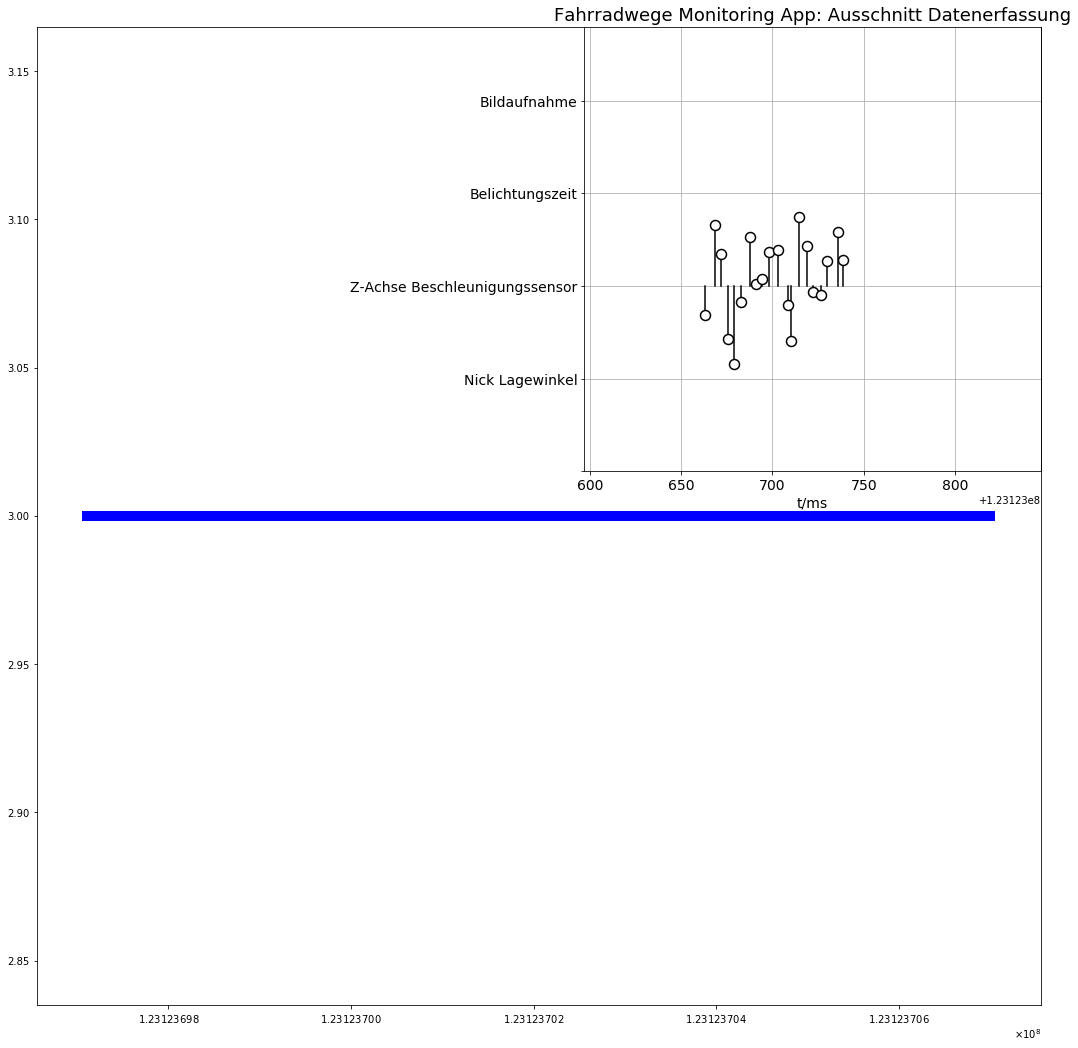

In [115]:
# Plot mit Gantt-Diagram
fig, ax = plt.subplots(figsize=(18,18))
i = 0
numberImages = 1
while i < numberImages:
        # Plot Belichtungszeit
        ax.hlines(xmin=featuresDf['Start der Belichtung in ns seit Start der JVM'].iloc[row+i]/1000000,
                    xmax=featuresDf['Start der Belichtung in ns seit Start der JVM'].iloc[row+i]/1000000+featuresDf['Belichtungszeit in ns'].iloc[row+i]/1000000,y=3, colors='blue', lw=10)
        # Nick Winkel Daten
        ax2 = fig.add_subplot(2,2,2)
        (markers, stemlines, baseline) = ax2.stem((sensorTimestampsDf.iloc[row+i].dropna()+featuresDf['Start des Zeitfensters in ns seit Start der JVM'].iloc[row+i])/1000000,
                                                 pitchDf.iloc[row+i].dropna()+2, 'k-', bottom=2.0, basefmt='None', markerfmt='wo')
        plt.setp(stemlines, linestyle='-', color='k', linewidth=1.5)
        plt.setp(markers, markeredgecolor='k', markersize=10, markeredgewidth=1.5, zorder=3)
        # Plot Bildaufnahme
        xy = [(featuresDf['Start der Belichtung in ns seit Start der JVM'].iloc[row+i]+featuresDf['Belichtungszeit in ns'].iloc[row+i]/2)/1000000, 4]
        imagebox = OffsetImage(images[row+i], zoom=0.8)
        imagebox.image.axes = ax
        ab = AnnotationBbox(imagebox, xy,
                        xybox=(0., 0.),
                        xycoords='data',
                        boxcoords="offset points",
                        frameon=False
                        )
        ax.add_artist(ab)
        i = i + 1
def formatter(y, pos):
    if y == 1:
        return 'Nick Lagewinkel'
    if y == 2:
        return 'Z-Achse Beschleunigungssensor'
    if y == 3:
        return 'Belichtungszeit'
    if y == 4:
        return 'Bildaufnahme'
    else:
        return ''

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.xaxis.major.formatter._useMathText = True
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms',fontsize=14)
plt.title('Fahrradwege Monitoring App: Ausschnitt Datenerfassung',fontsize=18)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(0,4.8)
plt.xlim(featuresDf['Start der Belichtung in ns seit Start der JVM'].iloc[row]/1000000-100,featuresDf['Start der Belichtung in ns seit Start der JVM'].iloc[row+i-1]/1000000+150)
plt.rcParams["legend.fontsize"] = 14
plt.show

[None, None, None, None]

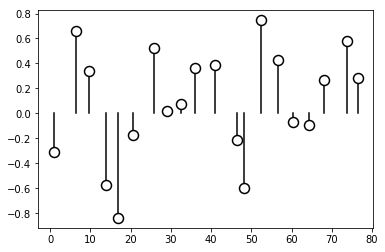

In [18]:
(markers, stemlines, baseline) = plt.stem(sensorTimestamps.dropna(), pitchDf.iloc[row].dropna(), 'k-', basefmt='None', markerfmt='wo')
plt.setp(stemlines, linestyle='-', color='k', linewidth=1.5)
plt.setp(markers, markeredgecolor='k', markersize=10, markeredgewidth=1.5, zorder=3)